<a href="https://colab.research.google.com/github/Mhtag/time_series_tutorial/blob/main/TimeSeries_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon revenue and Income Dataset

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [ ]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  61
Columns  :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values :   Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values :  
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [ ]:
amazon_df = df.set_index('Quarter')
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


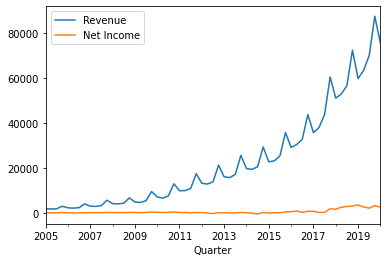

In [ ]:
df.plot()

In [ ]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# KPSS TEst


* Null hypothesis - data is stationary

* Alternate hypothesis - data is not stationary

In [ ]:
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
tstest = kpss(amazon_df['Revenue'], 'ct')
# 'c' : data is stationary around a constant.
# 'ct, : data is stationary around a trend.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [ ]:
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

## Additive                

# Decomposition

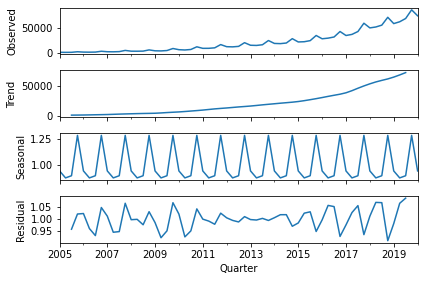

In [ ]:
import statsmodels.api as  sm                                   # Seasonal Decomposition
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')
resplot = res.plot()

Text(0.5, 1.0, 'TRend of our revenue')

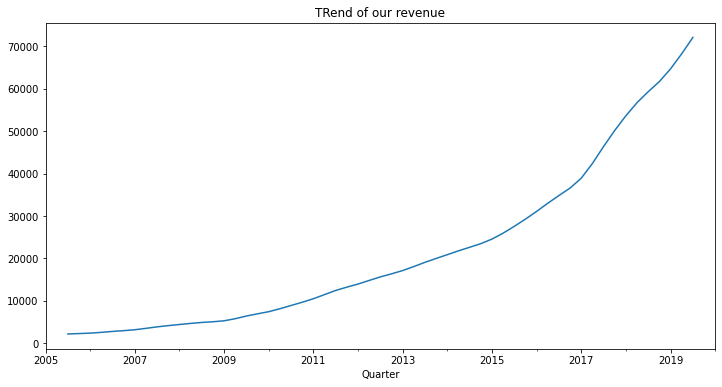

In [ ]:
plt.figure(figsize=(12,6))
res.trend.plot()
plt.title('TRend of our revenue')

Text(0.5, 1.0, 'Seasonality of revenue')

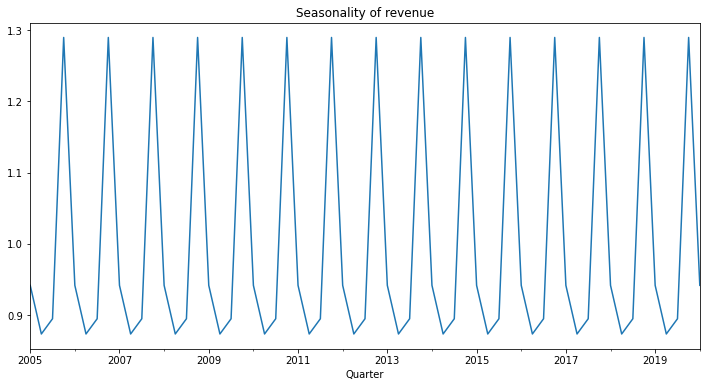

In [ ]:
plt.figure(figsize=(12,6))
res.seasonal.plot()
plt.title('Seasonality of revenue')

## we will see that our observed value is equal to multiplication of trend, seasonality and residual

In [ ]:
res.observed[2]

69981

In [ ]:
res.trend[2]*res.seasonal[2]*res.resid[2]

69980.99999999999

## lets detrend our observed value 




*   by dividing our observed with trend as its a mutiplicative model.
*   if its would have been a additive model, we would have subtracted our observed value with the trend.





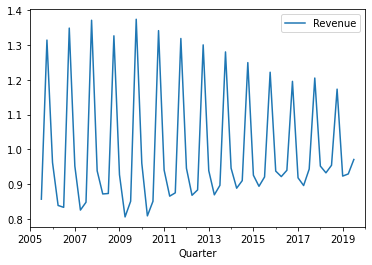

In [ ]:

pd.DataFrame(res.observed/res.trend).plot()